In [1]:
from matplotlib import pyplot as plt

from datasets import (load_Y2H_union_25,
 load_lit_bm_24,
  load_unstudied_genes,
   load_all_orfs)
from plotting import COLOR_Y2H, COLOR_LIT

In [2]:
unstudied_genes = load_unstudied_genes()
print(len(unstudied_genes), 'genes in the orignal list')
orfs = load_all_orfs()
unstudied = orfs.loc[orfs['orf_name'].isin(unstudied_genes) &
                     orfs['qualifier'].isin({'Verified', 'Uncharacterized'}), :].copy()
print(unstudied.shape[0], 'genes after filtering out dubious ORFs')
abbi = load_Y2H_union_25(remove_homodimers=True)
litbm = load_lit_bm_24(remove_homodimers=True)

979 genes in the orignal list
950 genes after filtering out dubious ORFs


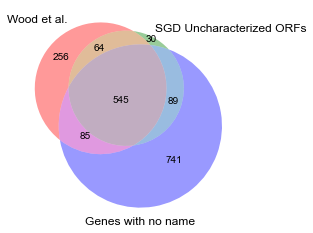

In [3]:
# venn diagram
a = set(unstudied['orf_name'].values)
b = set(orfs.loc[orfs['qualifier'] == 'Uncharacterized', 'orf_name'])
c = set(orfs.loc[orfs['gene_name'].isnull(), 'orf_name'])
from matplotlib_venn import venn3

venn3([a, b, c],
      set_labels=['Wood et al.', 'SGD Uncharacterized ORFs', 'Genes with no name'])
plt.savefig('../figures/unknown_function_list_comparison_venn.pdf',
            bbox_inches='tight')

In [4]:
abbi_u = abbi.loc[abbi['orf_name_a'].isin(unstudied_genes) | abbi['orf_name_b'].isin(unstudied_genes), :]

#Number of ORFs with at least one interaction
def count_orfs_of_unknown_function(ints):
    return len(unstudied_genes.intersection(
                 set(ints['orf_name_a'].unique())
                  .union(set(ints['orf_name_b'].unique()))))

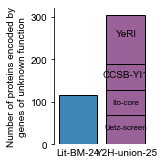

In [5]:
ys = [count_orfs_of_unknown_function(litbm.loc[(litbm['orf_name_a'].isin(unstudied_genes) 
                             |litbm['orf_name_b'].isin(unstudied_genes)), :])]
ys += [count_orfs_of_unknown_function(abbi_u.loc[abbi_u['Uetz-screen'], :]),
       count_orfs_of_unknown_function(abbi_u.loc[abbi_u['Uetz-screen'] | abbi_u['Ito-core'], :]),
       count_orfs_of_unknown_function(abbi_u.loc[abbi_u['Uetz-screen'] | abbi_u['Ito-core'] | abbi_u['CCSB-YI1'], :]),
       count_orfs_of_unknown_function(abbi_u.loc[abbi_u['Uetz-screen'] | abbi_u['Ito-core'] | abbi_u['CCSB-YI1'] | abbi_u['YeRI'], :])]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=1.7, h=2.5)

bottom = [0, 0] + ys[1:-1]
heights = [y - b for y, b in zip(ys, bottom)]

ax.bar(x=['Lit-BM-24'] + ['Y2H-union-25'] * 4,
       height=heights,
       bottom=bottom,
       color=[COLOR_LIT] + [COLOR_Y2H] * 4,
       edgecolor='black')

ax.text(1, 40, 'Uetz-screen', ha='center', va='center', fontsize=8)
ax.text(1, 100, 'Ito-core', ha='center', va='center', fontsize=8)
ax.text(1, 165, 'CCSB-YI1', ha='center', va='center')
ax.text(1, 260, 'YeRI', ha='center', va='center')

ax.set_ylabel('Number of proteins encoded by\ngenes of unknown function')
ax.xaxis.set_tick_params(rotation=0, length=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('../figures/n_genes_unknown_function_with_PPI.pdf',
            bbox_inches='tight')

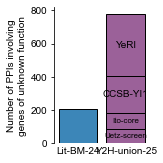

In [6]:
ys = [(litbm['orf_name_a'].isin(unstudied_genes) 
       | litbm['orf_name_b'].isin(unstudied_genes)).sum()]
ys += [abbi_u['Uetz-screen'].sum(),
       (abbi_u['Uetz-screen'] | abbi_u['Ito-core']).sum(),
       (abbi_u['Uetz-screen'] | abbi_u['Ito-core'] | abbi_u['CCSB-YI1']).sum(),
       (abbi_u['Uetz-screen'] | abbi_u['Ito-core'] | abbi_u['CCSB-YI1'] | abbi_u['YeRI']).sum()]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(w=1.7, h=2.5)

bottom = [0, 0] + ys[1:-1]
heights = [y - b for y, b in zip(ys, bottom)]

ax.bar(x=['Lit-BM-24'] + ['Y2H-union-25'] * 4,
       height=heights,
       bottom=bottom,
       color=[COLOR_LIT] + [COLOR_Y2H] * 4,
       edgecolor='black')

ax.text(1, ys[1] / 2., 'Uetz-screen', ha='center', va='center', fontsize=8)
ax.text(1, (ys[2] - ys[1]) / 2. + ys[1], 'Ito-core', ha='center', va='center', fontsize=8)
ax.text(1, (ys[3] - ys[2]) / 2. + ys[2], 'CCSB-YI1', ha='center', va='center')
ax.text(1, (ys[4] - ys[3]) / 2. + ys[3], 'YeRI', ha='center', va='center')

ax.set_ylabel('Number of PPIs involving\ngenes of unknown function')
ax.xaxis.set_tick_params(rotation=0, length=0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('../figures/n_ppi_unknown_function_stacked.pdf',
            bbox_inches='tight')